In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
train_df = pd.read_parquet('../data/train/train_filtered.parquet')
test_df = pd.read_parquet('../data/test/test_filtered.parquet')

In [4]:
print('shape of train set in member: ', train_df.shape)
print('shape of test set in member: ', test_df.shape)

shape of train set in member:  (2400000, 743)
shape of test set in member:  (600000, 742)


### 년/월 변수 추출

In [5]:
date = pd.to_datetime(train_df['기준년월'], format='%Y%m')
train_df['year'] = date.dt.year
train_df['month'] = date.dt.month

train_df['year'] = train_df['year'].astype(int)
train_df['month'] = train_df['month'].astype(int)

In [6]:
date = pd.to_datetime(test_df['기준년월'], format='%Y%m')
test_df['year'] = date.dt.year
test_df['month'] = date.dt.month

test_df['year'] = test_df['year'].astype(int)
test_df['month'] = test_df['month'].astype(int)

In [7]:
train_df.to_parquet('../data/train/train_filtered03.parquet', index=False)
test_df.to_parquet('../data/test/test_filtered03.parquet', index=False)

##### 전체 ID를 기준으로 7, 8, 9, 10, 11, 12월에 따라 Segment 값의 변화가 없음. -> 기준년월 컬럼 제거(시간적 특성 반영x)

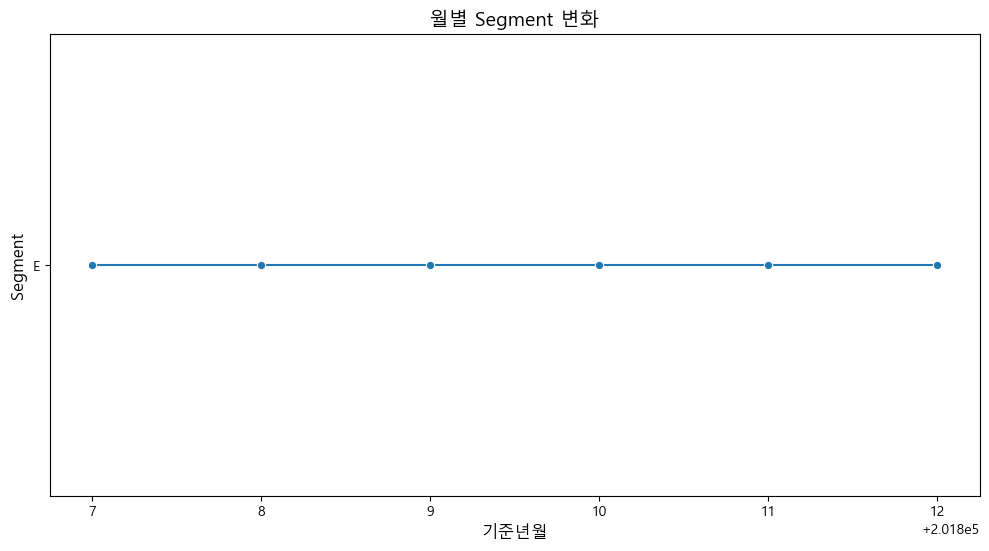

In [48]:
# 'TRAIN_000000'에 해당하는 데이터 필터링
plt.figure(figsize=(12, 6))
id = 'TRAIN_000001'
sns.lineplot(x=train_df[train_df['ID'] == id].sort_values(by='기준년월')['기준년월'],
             y=train_df[train_df['ID'] == id].sort_values(by='기준년월')['Segment'],
             marker='o', linestyle='-')

plt.title("월별 Segment 변화", fontsize=14)
plt.xlabel("기준년월", fontsize=12)
plt.ylabel("Segment", fontsize=12)
plt.show()

In [38]:
segment_change_by_month = train_df.groupby('ID')['Segment'].nunique().reset_index()
segment_change_by_month['Segment_changed'] = segment_change_by_month['Segment'] == 1 # no changed = 1
print('num of unchanged segment id: {}%'.format(sum(segment_change_by_month['Segment_changed'])/len(segment_change_by_month)*100))

num of unchanged segment id: 100.0%


In [54]:
train_df.drop(columns=['기준년월']).to_parquet('../data/train/train_filtered03.parquet', index=False)
test_df.drop(columns=['기준년월']).to_parquet('../data/test/test_filtered03.parquet', index=False)